## Importing Libraries

In [15]:
#import folium                                 # visualization
import geopandas as gpd                        # data analysis and manipulation
import glob                                   # data access
import json                                   # JSON encoder and decoder
import matplotlib.pyplot as plt               # create visualizations
import numpy as np                            # scientific computing
import os                                     # data access
from datetime import date                     # dates, times and intervals
from folium import plugins                    # visualization
from scripts.credential import username_landsat, password_landsat, username_sentinel, password_sentinel
from scripts.download_imagery import DownloadImagery
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt  # interface to Open Access Hub
from shapely.geometry import Polygon, Point
from zipfile import ZipFile                   # file management
import pandas as pd
import time                                   # time assessment


## Reading Area of Interest

In [16]:
geom = gpd.read_file('../raw_data/flooded_areas.geojson')
geom.head()

,fid,geometry
0,1,"POLYGON ((32.47466 46.53912, 32.47466 46.79573..."


## Downloading Sentinel Imagery

In [17]:
sentinel_gdf = DownloadImagery.search_sentinel(username = username_sentinel,
                                                password = password_sentinel,
                                                boundary= geom,
                                                start_date= '20230520',
                                                end_date= '20230620',
                                                max_cloud_cover= 10)

In [18]:
sentinel_gdf

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry,contains
04a3420b-ec7a-4906-b2bb-7b6b265bad2b,S2B_MSIL2A_20230603T084559_N0509_R107_T36TVS_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-06-03T08:45:59.024Z, Instrument: MS...",false,2023-06-03 10:23:06,2023-06-03 08:45:59.024,2023-06-03 08:45:59.024,2023-06-03 13:43:33.314,...,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20230603T102306_S2023...,S2B_OPER_MSI_L2A_TL_2BPS_20230603T102306_A0325...,S2B_MSIL2A_20230603T084559_N0509_R107_T36TVS_2...,04a3420b-ec7a-4906-b2bb-7b6b265bad2b,"MULTIPOLYGON (((31.70900 45.95826, 33.12597 45...",True
f6938ec2-4851-4a4b-ad8f-f8ec10edbcfd,S2A_MSIL2A_20230618T084601_N0509_R107_T36TVS_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-06-18T08:46:01.024Z, Instrument: MS...",false,2023-06-18 15:16:02,2023-06-18 08:46:01.024,2023-06-18 08:46:01.024,2023-06-18 17:26:08.614,...,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20230618T151602_S2023...,S2A_OPER_MSI_L2A_TL_2APS_20230618T151602_A0417...,S2A_MSIL2A_20230618T084601_N0509_R107_T36TVS_2...,f6938ec2-4851-4a4b-ad8f-f8ec10edbcfd,"MULTIPOLYGON (((31.70900 45.95826, 33.12597 45...",True


<Axes: >

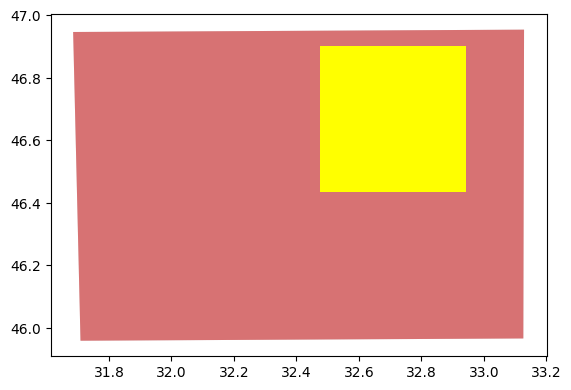

In [20]:
ax = sentinel_gdf.plot('platformidentifier',
                    alpha = 0.5,
                    cmap = 'Set1',
                    #legend = True
                     )
geom.plot(ax=ax)

square_geom = DownloadImagery.create_square_bbox(geom['geometry'])

square_geom.plot(ax=ax, color = 'yellow')

In [21]:
for i in sentinel_gdf['identifier']:
    try:
        DownloadImagery.download_sentinel(username = username_sentinel,
                                password = password_sentinel,
                                gdf = sentinel_gdf,
                                idx = 0,
                                bound_crs= geom)
    except:
        print(f'Not possible to download {i}.')
        pass

Not possible to download S2B_MSIL2A_20230603T084559_N0509_R107_T36TVS_20230603T102306.
Not possible to download S2A_MSIL2A_20230618T084601_N0509_R107_T36TVS_20230618T151602.


## Downloading Landsat imagery

In [22]:
centroidx, centroidy = geom.centroid.x, geom.centroid.y

C:\Users\cande\AppData\Local\Temp\ipykernel_12872\1844159588.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroidx, centroidy = geom.centroid.x, geom.centroid.y


In [29]:
landsat_search = DownloadImagery.search_landast(lat = centroidy[0],
                               long = centroidx[0],
                               start_date = '2023-05-20', 
                               end_date = '2023-06-20',
                               dataset='landsat_ot_c2_l2', 
                               max_cloud_cover=5)

4 scenes found.


In [30]:
landsat_search

,cloud_cover,entity_id,display_id,ordering_id,landsat_product_id,landsat_scene_id,acquisition_date,collection_category,collection_number,wrs_path,...,corner_lower_right_latitude,corner_lower_right_longitude,has_customized_metadata,options,selected,spatial_bounds,spatial_coverage,temporal_coverage,publish_date,geometry
0,4,LC81790282023168LGN00,LC08_L2SP_179028_20230617_20230623_02_T1,None,LC08_L1TP_179028_20230617_20230623_02_T1,LC81790282023168LGN00,2023-06-17,2023-07-01,2,179,...,44.94989,33.66680,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(30.6585, 44.95226, 33.68665, 47.09115)","POLYGON ((30.6585 45.38224, 33.01614 44.95226,...","[2023-06-17 00:00:00, 2023-06-17 00:00:00]",2023-06-23 00:44:36-05:00,"POLYGON ((30.65850 45.38224, 33.01614 44.95226..."
1,2,LC91790272023160LGN00,LC09_L2SP_179027_20230609_20230611_02_T1,None,LC09_L1TP_179027_20230609_20230610_02_T1,LC91790272023160LGN00,2023-06-09,2023-07-01,2,179,...,46.36641,34.14796,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(31.06915, 46.37124, 34.18426, 48.51054)","POLYGON ((31.06915 46.80355, 33.48655 46.37124...","[2023-06-09 00:00:00, 2023-06-09 00:00:00]",2023-06-10 23:50:20-05:00,"POLYGON ((31.06915 46.80355, 33.48655 46.37124..."
2,3,LC81790272023152LGN00,LC08_L2SP_179027_20230601_20230607_02_T1,None,LC08_L1TP_179027_20230601_20230607_02_T1,LC81790272023152LGN00,2023-06-01,2023-07-01,2,179,...,46.36274,34.24148,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(31.16167, 46.36892, 34.27944, 48.51241)","POLYGON ((31.16167 46.80583, 33.57862 46.36892...","[2023-06-01 00:00:00, 2023-06-01 00:00:00]",2023-06-07 05:43:19-05:00,"POLYGON ((31.16167 46.80583, 33.57862 46.36892..."
3,1,LC81790282023152LGN00,LC08_L2SP_179028_20230601_20230607_02_T1,None,LC08_L1TP_179028_20230601_20230607_02_T1,LC81790282023152LGN00,2023-06-01,2023-07-01,2,179,...,44.94984,33.67441,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(30.66583, 44.9522, 33.69417, 47.09108)","POLYGON ((30.66583 45.38222, 33.0236 44.9522, ...","[2023-06-01 00:00:00, 2023-06-01 00:00:00]",2023-06-07 05:44:13-05:00,"POLYGON ((30.66583 45.38222, 33.02360 44.95220..."


<Axes: >

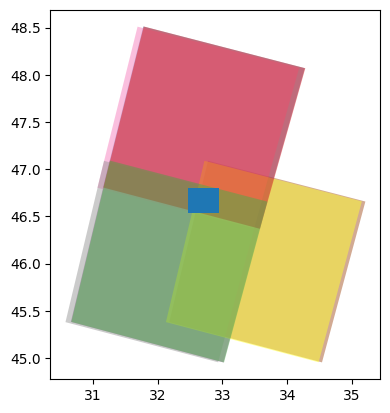

In [25]:
ax = landsat_search.plot('entity_id',
                    alpha = 0.5,
                    cmap = 'Set1',
                    #legend = True
                     )
geom.plot(ax=ax)

In [37]:
for i in landsat_search['entity_id']:
    try:
        DownloadImagery.download_landsat(username = username_landsat,
                                 password = password_landsat,
                                 id = i,
                                 output_dir = f'.././output/{i}')
    except:
        print(f'Not possible to download {i}.')
        pass

Not possible to download LC81790282023168LGN00.
Not possible to download LC91790272023160LGN00.
Not possible to download LC81790272023152LGN00.
Not possible to download LC81790282023152LGN00.


In [36]:
try:
    DownloadImagery.download_landsat(username = username_landsat,
                                 password = password_landsat,
                                 id = 'LC91790272023160LGN00',
                                 output_dir = f'.././output/{i}')
except:
    print(f'Not possible to download {i}.')
    pass

Not possible to download LC81790282023152LGN00.
